In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis, mode
from tabulate import tabulate
import operator
import gzip

In [2]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [4]:
from sklearn.preprocessing import PolynomialFeatures

In [5]:
from sklearn.tree import DecisionTreeRegressor

In [6]:

df = pd.read_csv("D:/Semester 3/Data Mining/bottle.csv", low_memory=False)

In [7]:
display(df.head())

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,NaN,25.649,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,NaN,25.656,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,NaN,25.654,NaN,...,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,NaN,25.643,NaN,...,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,NaN,25.643,NaN,...,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
display(df.tail())

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
864858,34404,864859,093.4 026.4,20-1611SR-MX-310-2239-09340264-0000A-7,0,18.744,33.4083,5.805,23.87055,108.74,...,0.18,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
864859,34404,864860,093.4 026.4,20-1611SR-MX-310-2239-09340264-0002A-3,2,18.744,33.4083,5.805,23.87072,108.74,...,0.18,2,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
864860,34404,864861,093.4 026.4,20-1611SR-MX-310-2239-09340264-0005A-3,5,18.692,33.4150,5.796,23.88911,108.46,...,0.18,5,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
864861,34404,864862,093.4 026.4,20-1611SR-MX-310-2239-09340264-0010A-3,10,18.161,33.4062,5.816,24.01426,107.74,...,0.31,10,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
864862,34404,864863,093.4 026.4,20-1611SR-MX-310-2239-09340264-0015A-3,15,17.533,33.3880,5.774,24.15297,105.66,...,0.61,15,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
display(df.isnull())

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,False,False,False,False,False,False,False,True,False,True,...,True,False,True,True,True,True,True,True,True,True
1,False,False,False,False,False,False,False,True,False,True,...,True,False,True,True,True,True,True,True,True,True
2,False,False,False,False,False,False,False,True,False,True,...,True,False,True,True,True,True,True,True,True,True
3,False,False,False,False,False,False,False,True,False,True,...,True,False,True,True,True,True,True,True,True,True
4,False,False,False,False,False,False,False,True,False,True,...,True,False,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
864858,False,False,False,False,False,False,False,False,False,False,...,False,False,True,True,True,True,True,True,True,True
864859,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,True,True,True,True,True
864860,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,True,True,True,True,True
864861,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,True,True,True,True,True


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864863 entries, 0 to 864862
Data columns (total 74 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Cst_Cnt              864863 non-null  int64  
 1   Btl_Cnt              864863 non-null  int64  
 2   Sta_ID               864863 non-null  object 
 3   Depth_ID             864863 non-null  object 
 4   Depthm               864863 non-null  int64  
 5   T_degC               853900 non-null  float64
 6   Salnty               817509 non-null  float64
 7   O2ml_L               696201 non-null  float64
 8   STheta               812174 non-null  float64
 9   O2Sat                661274 non-null  float64
 10  Oxy_µmol/Kg          661268 non-null  float64
 11  BtlNum               118667 non-null  float64
 12  RecInd               864863 non-null  int64  
 13  T_prec               853900 non-null  float64
 14  T_qual               23127 non-null   float64
 15  S_prec           

In [11]:
df.describe()

,Cst_Cnt,Btl_Cnt,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,BtlNum,...,R_CHLA,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1
count,864863.000000,864863.000000,864863.000000,853900.000000,817509.000000,696201.000000,812174.000000,661274.000000,661268.000000,118667.000000,...,225276.000000,225275.000000,864863.000000,122006.000000,1999.000000,224.000000,2084.000000,234.000000,10.000000,84.000000
mean,17138.790958,432432.000000,226.831951,10.799677,33.840350,3.392468,25.819394,57.103779,148.808694,10.497426,...,0.450225,0.198599,228.395694,162.071521,2153.239714,2168.148330,2256.055845,2278.858803,7.948570,7.910983
std,10240.949817,249664.587267,316.050259,4.243825,0.461843,2.073256,1.167787,37.094137,90.187533,6.189688,...,1.208566,0.376539,319.456731,85.722796,112.995202,154.852332,34.844435,58.496495,0.021216,0.077666
min,1.000000,1.000000,0.000000,1.440000,28.431000,-0.010000,20.934000,-0.100000,-0.434900,0.000000,...,-0.010000,-3.890000,0.000000,0.000000,1948.850000,1969.440000,2181.570000,2198.150000,7.923100,7.618300
25%,8269.000000,216216.500000,46.000000,7.680000,33.488000,1.360000,24.965000,21.100000,60.915470,5.000000,...,0.050000,0.050000,46.000000,200.000000,2028.330000,2008.977500,2230.322500,2229.062500,7.931475,7.898675
50%,16848.000000,432432.000000,125.000000,10.060000,33.863000,3.440000,25.996000,54.400000,151.064150,10.000000,...,0.160000,0.110000,126.000000,206.000000,2170.640000,2265.885000,2244.325000,2247.505000,7.946650,7.928850
75%,26557.000000,648647.500000,300.000000,13.880000,34.196900,5.500000,26.646000,97.600000,240.379600,16.000000,...,0.390000,0.230000,302.000000,214.000000,2253.810000,2315.525000,2278.505000,2316.452500,7.963300,7.955100
max,34404.000000,864863.000000,5351.000000,31.140000,37.034000,11.130000,250.784000,214.100000,485.701800,25.000000,...,66.110000,65.300000,5458.000000,424.000000,2367.800000,2364.420000,2434.900000,2437.000000,7.988300,8.047700


In [12]:
features_with_null = [feature for feature in df.columns if df[feature].isnull().sum()>0]
if features_with_null:
    print(f'Features with Null Values {features_with_null}')
else:
    print('Dataset contains no Null Values')

Features with Null Values ['T_degC', 'Salnty', 'O2ml_L', 'STheta', 'O2Sat', 'Oxy_µmol/Kg', 'BtlNum', 'T_prec', 'T_qual', 'S_prec', 'S_qual', 'P_qual', 'O_qual', 'SThtaq', 'O2Satq', 'ChlorA', 'Chlqua', 'Phaeop', 'Phaqua', 'PO4uM', 'PO4q', 'SiO3uM', 'SiO3qu', 'NO2uM', 'NO2q', 'NO3uM', 'NO3q', 'NH3uM', 'NH3q', 'C14As1', 'C14A1p', 'C14A1q', 'C14As2', 'C14A2p', 'C14A2q', 'DarkAs', 'DarkAp', 'DarkAq', 'MeanAs', 'MeanAp', 'MeanAq', 'IncTim', 'LightP', 'R_TEMP', 'R_POTEMP', 'R_SALINITY', 'R_SIGMA', 'R_SVA', 'R_DYNHT', 'R_O2', 'R_O2Sat', 'R_SIO3', 'R_PO4', 'R_NO3', 'R_NO2', 'R_NH4', 'R_CHLA', 'R_PHAEO', 'R_SAMP', 'DIC1', 'DIC2', 'TA1', 'TA2', 'pH2', 'pH1', 'DIC Quality Comment']


In [13]:
duplicate_sum = df.duplicated().sum()
if duplicate_sum:
    print(f'Duplicates Rows in Dataset are : {duplicate_sum}')
else:
    print('Dataset contains no Duplicate Values')

Dataset contains no Duplicate Values


In [14]:
dataset = df[['T_degC','Salnty','Btl_Cnt','Depthm','O2ml_L','O2Sat','Oxy_µmol/Kg','BtlNum']]

dataset

,T_degC,Salnty,Btl_Cnt,Depthm,O2ml_L,O2Sat,Oxy_µmol/Kg,BtlNum
0,10.500,33.4400,1,0,NaN,NaN,NaN,NaN
1,10.460,33.4400,2,8,NaN,NaN,NaN,NaN
2,10.460,33.4370,3,10,NaN,NaN,NaN,NaN
3,10.450,33.4200,4,19,NaN,NaN,NaN,NaN
4,10.450,33.4210,5,20,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
864858,18.744,33.4083,864859,0,5.805,108.74,253.47,NaN
864859,18.744,33.4083,864860,2,5.805,108.74,253.47,4.0
864860,18.692,33.4150,864861,5,5.796,108.46,253.06,3.0
864861,18.161,33.4062,864862,10,5.816,107.74,253.92,2.0


In [15]:
dataset.isnull().sum()

T_degC          10963
Salnty          47354
Btl_Cnt             0
Depthm              0
O2ml_L         168662
O2Sat          203589
Oxy_µmol/Kg    203595
BtlNum         746196
dtype: int64

In [16]:
final_data = dataset.dropna()
final_data.isnull().sum()

T_degC         0
Salnty         0
Btl_Cnt        0
Depthm         0
O2ml_L         0
O2Sat          0
Oxy_µmol/Kg    0
BtlNum         0
dtype: int64

In [17]:
final_data.head(20)

,T_degC,Salnty,Btl_Cnt,Depthm,O2ml_L,O2Sat,Oxy_µmol/Kg,BtlNum
683767,14.26,33.396,683768,1,6.05,103.8,263.6302,1.0
683768,14.29,33.396,683769,6,6.06,104.0,264.0675,2.0
683770,14.30,33.401,683771,12,6.06,104.0,264.0670,3.0
683772,14.32,33.406,683773,22,6.03,103.5,262.7597,4.0
683774,14.23,33.411,683775,31,5.99,102.7,261.0108,5.0
683775,14.08,33.420,683776,41,5.84,99.8,254.4650,6.0
683777,14.01,33.428,683778,51,5.72,97.6,249.2311,7.0
683778,13.89,33.438,683779,61,5.53,94.1,240.9450,8.0
683779,13.84,33.445,683780,70,5.45,92.7,237.4556,9.0
683781,14.62,33.361,683782,1,5.96,102.9,259.7345,1.0


In [18]:
final_data.tail(50)

,T_degC,Salnty,Btl_Cnt,Depthm,O2ml_L,O2Sat,Oxy_µmol/Kg,BtlNum
864785,8.786,33.9054,864786,232,2.780,42.50,121.34,6.0
864787,8.251,34.0139,864788,272,2.236,33.80,97.58,5.0
864789,7.577,34.0903,864790,320,1.463,21.78,63.84,4.0
864790,7.013,34.1532,864791,381,0.939,13.80,40.98,3.0
864792,6.442,34.1610,864793,440,0.701,10.17,30.59,2.0
864794,6.120,34.2322,864795,514,0.419,6.03,18.28,1.0
864796,19.390,33.3005,864797,3,5.316,100.73,232.15,20.0
864798,19.391,33.3025,864799,11,5.296,100.35,231.25,19.0
864800,19.393,33.3017,864801,26,5.312,100.65,231.94,18.0
864802,19.402,33.3017,864803,41,5.296,100.36,231.25,17.0


In [19]:
def handle_negatives(row):
    if row <0:
        # whatever  you logic
        return 0
    else:
        return row
final_data["O2ml_L"] =final_data["O2ml_L"].apply(handle_negatives)

C:\Users\Dafa\AppData\Local\Temp\ipykernel_1604\4124028387.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data["O2ml_L"] =final_data["O2ml_L"].apply(handle_negatives)


In [20]:
def handle_negatives(row):
    if row <0:
        # whatever  you logic
        return 0
    else:
        return row
final_data["O2Sat"] =final_data["O2Sat"].apply(handle_negatives)

C:\Users\Dafa\AppData\Local\Temp\ipykernel_1604\455550267.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data["O2Sat"] =final_data["O2Sat"].apply(handle_negatives)


In [21]:
def handle_negatives(row):
    if row <0:
        # whatever  you logic
        return 0
    else:
        return row
final_data["Oxy_µmol/Kg"] =final_data["Oxy_µmol/Kg"].apply(handle_negatives)

C:\Users\Dafa\AppData\Local\Temp\ipykernel_1604\700116710.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data["Oxy_µmol/Kg"] =final_data["Oxy_µmol/Kg"].apply(handle_negatives)


In [22]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 114934 entries, 683767 to 864862
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   T_degC       114934 non-null  float64
 1   Salnty       114934 non-null  float64
 2   Btl_Cnt      114934 non-null  int64  
 3   Depthm       114934 non-null  int64  
 4   O2ml_L       114934 non-null  float64
 5   O2Sat        114934 non-null  float64
 6   Oxy_µmol/Kg  114934 non-null  float64
 7   BtlNum       114934 non-null  float64
dtypes: float64(6), int64(2)
memory usage: 7.9 MB


In [23]:
final_data.describe()

,T_degC,Salnty,Btl_Cnt,Depthm,O2ml_L,O2Sat,Oxy_µmol/Kg,BtlNum
count,114934.000000,114934.000000,114934.000000,114934.000000,114934.000000,114934.000000,114934.000000,114934.000000
mean,11.199064,33.681675,775061.792672,153.105765,3.773015,62.860201,164.383405,10.309604
std,3.541155,0.397412,52292.277086,156.941071,1.977151,35.485291,86.216488,6.069612
min,1.520000,31.101000,683768.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.430000,33.366000,729973.250000,40.000000,2.020000,30.700000,87.872110,5.000000
50%,10.610000,33.632000,775326.000000,99.000000,4.070000,64.600000,177.200900,10.000000
75%,13.962750,34.059000,820782.750000,229.000000,5.680000,100.400000,247.660600,15.000000
max,23.420000,34.681000,864863.000000,3542.000000,11.130000,214.100000,485.701800,24.000000


In [24]:
final_data.corr()

,T_degC,Salnty,Btl_Cnt,Depthm,O2ml_L,O2Sat,Oxy_µmol/Kg,BtlNum
T_degC,1.000000,-0.777925,-0.006202,-0.791259,0.879617,0.918408,0.880095,0.749703
Salnty,-0.777925,1.000000,-0.042002,0.767947,-0.914710,-0.903169,-0.914820,-0.698445
Btl_Cnt,-0.006202,-0.042002,1.000000,0.000363,-0.027357,-0.024459,-0.026819,-0.030577
Depthm,-0.791259,0.767947,0.000363,1.000000,-0.834627,-0.825489,-0.834532,-0.700889
O2ml_L,0.879617,-0.914710,-0.027357,-0.834627,1.000000,0.994984,0.999999,0.745065
O2Sat,0.918408,-0.903169,-0.024459,-0.825489,0.994984,1.000000,0.995094,0.755958
Oxy_µmol/Kg,0.880095,-0.914820,-0.026819,-0.834532,0.999999,0.995094,1.000000,0.745210
BtlNum,0.749703,-0.698445,-0.030577,-0.700889,0.745065,0.755958,0.745210,1.000000


In [25]:
final_data.to_csv('calcofi8atri.csv',index=False)

In [26]:
#scatter plot kuapus sementara karena lamo compile nyo

In [27]:
numeric_df = final_data.select_dtypes(include=[np.number])

def calculate_statistics(final_data):
    stats = pd.DataFrame(index=final_data.columns, columns=['Mean', 'Median', 'Mode', 'Std Dev', 'Variance', 'Skewness', 'Kurtosis'])

    
    
numeric_cols = final_data.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    print(f"\nStatistik untuk {col} : ")
    print(f"Mean               : {final_data[col].mean()}")
    print(f"Median             : {final_data[col].median()}")
    print(f"Mode               : {final_data[col].mode()[0]}")
    print(f"Standar Deviasi    : {final_data[col].std()}")
    print(f"Variansi           : {final_data[col].var()}")
    print(f"Skewness           : {final_data[col].skew()}")
    print(f"Kurtosis           : {final_data[col].kurt()}")


Statistik untuk T_degC : 
Mean               : 11.199063914942487
Median             : 10.61
Mode               : 9.1
Standar Deviasi    : 3.541155166685777
Variansi           : 12.539779914545372
Skewness           : 0.3921696522892289
Kurtosis           : -0.6847989150909499

Statistik untuk Salnty : 
Mean               : 33.681675245793244
Median             : 33.632
Mode               : 34.239
Standar Deviasi    : 0.39741240737424927
Variansi           : 0.15793662153499627
Skewness           : -0.06511885914653875
Kurtosis           : -1.0781981792027029

Statistik untuk Btl_Cnt : 
Mean               : 775061.7926723163
Median             : 775326.0
Mode               : 683768
Standar Deviasi    : 52292.277085929265
Variansi           : 2734482242.8316026
Skewness           : -0.019298579280895945
Kurtosis           : -1.2029520835537184

Statistik untuk Depthm : 
Mean               : 153.10576504776654
Median             : 99.0
Mode               : 2
Standar Deviasi    : 156.941

In [28]:
statistics = calculate_statistics(final_data)
print(statistics)

correlation_matrix = numeric_df.corr()
print("\nMatriks Korelasi:\n", correlation_matrix)

None

Matriks Korelasi:
                T_degC    Salnty   Btl_Cnt    Depthm    O2ml_L     O2Sat  \
T_degC       1.000000 -0.777925 -0.006202 -0.791259  0.879617  0.918408   
Salnty      -0.777925  1.000000 -0.042002  0.767947 -0.914710 -0.903169   
Btl_Cnt     -0.006202 -0.042002  1.000000  0.000363 -0.027357 -0.024459   
Depthm      -0.791259  0.767947  0.000363  1.000000 -0.834627 -0.825489   
O2ml_L       0.879617 -0.914710 -0.027357 -0.834627  1.000000  0.994984   
O2Sat        0.918408 -0.903169 -0.024459 -0.825489  0.994984  1.000000   
Oxy_µmol/Kg  0.880095 -0.914820 -0.026819 -0.834532  0.999999  0.995094   
BtlNum       0.749703 -0.698445 -0.030577 -0.700889  0.745065  0.755958   

             Oxy_µmol/Kg    BtlNum  
T_degC          0.880095  0.749703  
Salnty         -0.914820 -0.698445  
Btl_Cnt        -0.026819 -0.030577  
Depthm         -0.834532 -0.700889  
O2ml_L          0.999999  0.745065  
O2Sat           0.995094  0.755958  
Oxy_µmol/Kg     1.000000  0.745210  
Btl

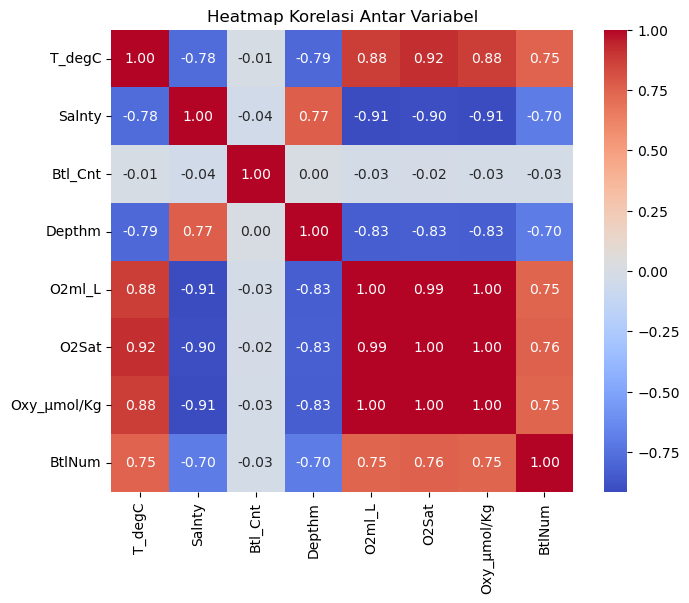


Nilai yang Hilang :
-  -----------  -
0  T_degC       0
1  Salnty       0
2  Btl_Cnt      0
3  Depthm       0
4  O2ml_L       0
5  O2Sat        0
6  Oxy_µmol/Kg  0
7  BtlNum       0
-  -----------  -


In [29]:
# Plot heatmap korelasi
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', cbar=True, square=True, fmt='.2f')
plt.title('Heatmap Korelasi Antar Variabel')
plt.show()

missing_values=final_data.isnull().sum().reset_index()
missing_values.columns=['column', 'Misiing Values']
print ('\nNilai yang Hilang :')
print (tabulate(missing_values) )

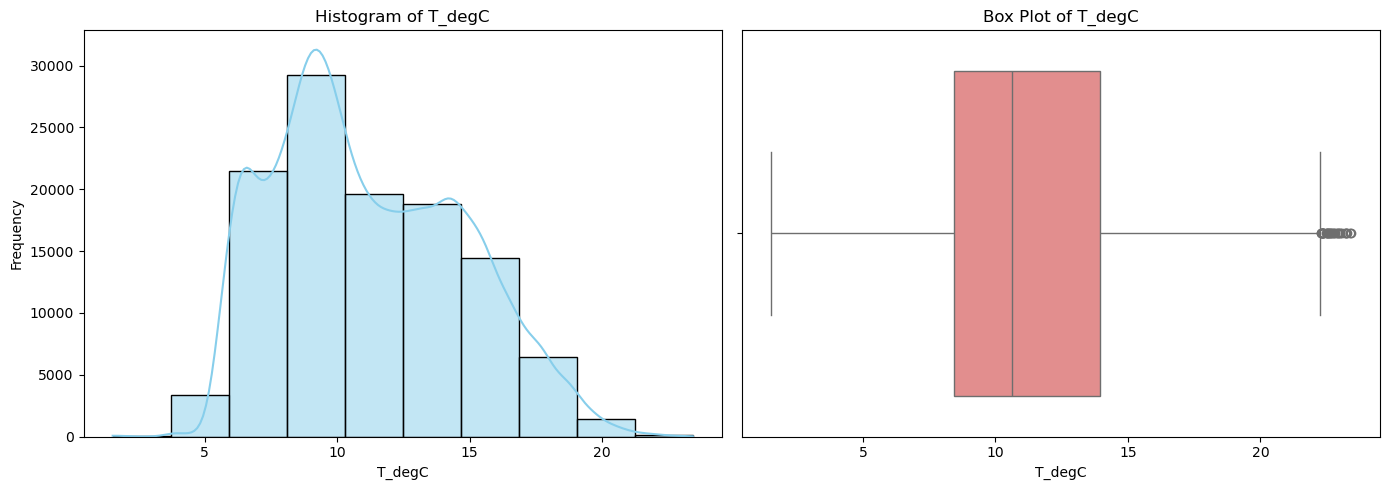

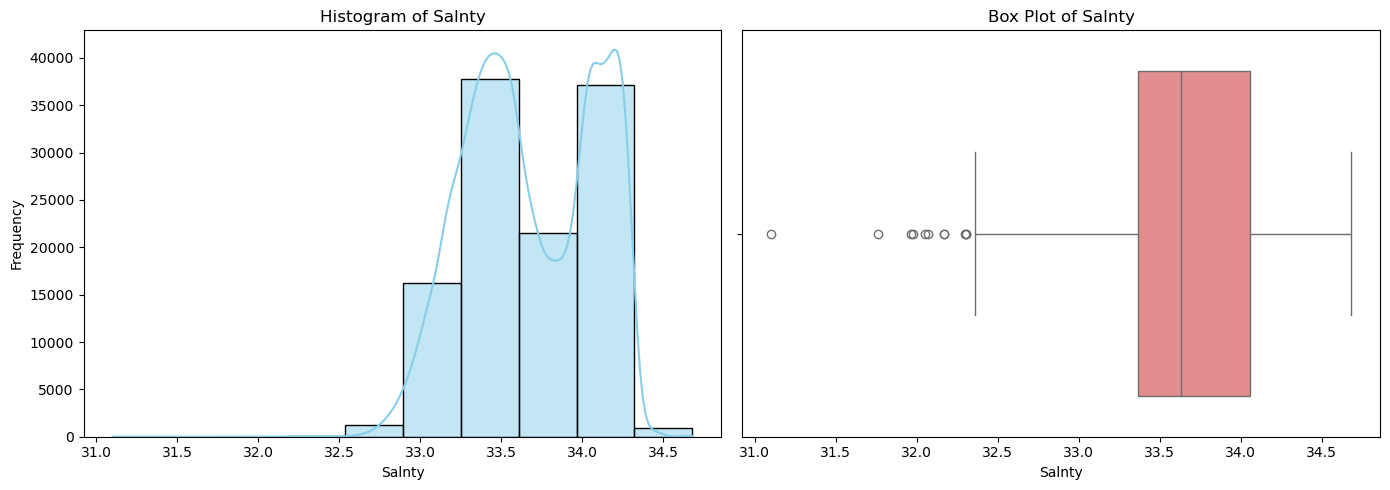

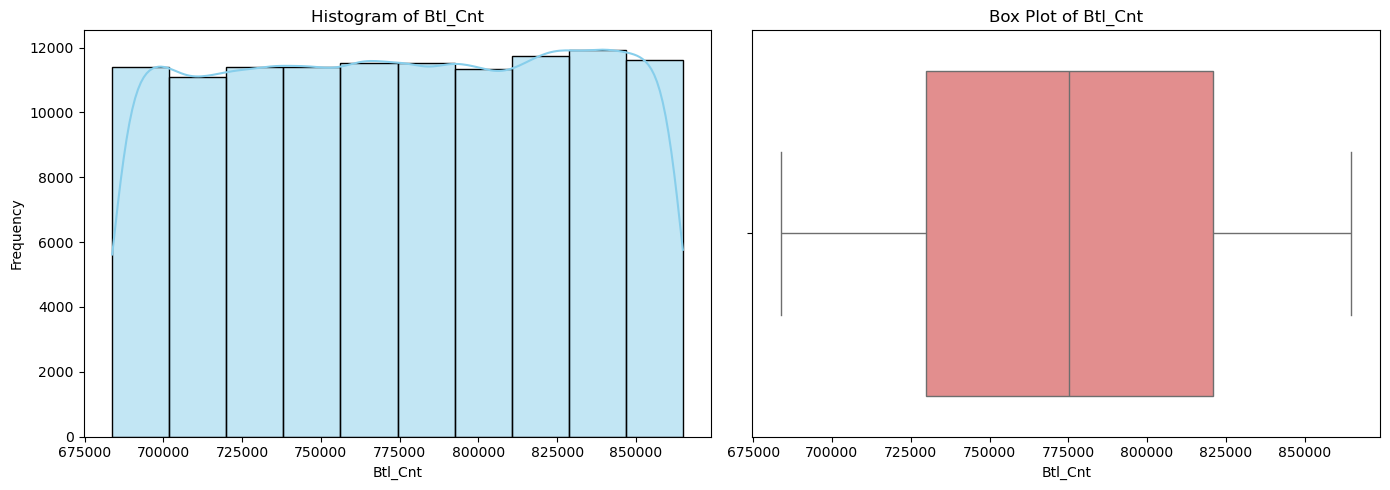

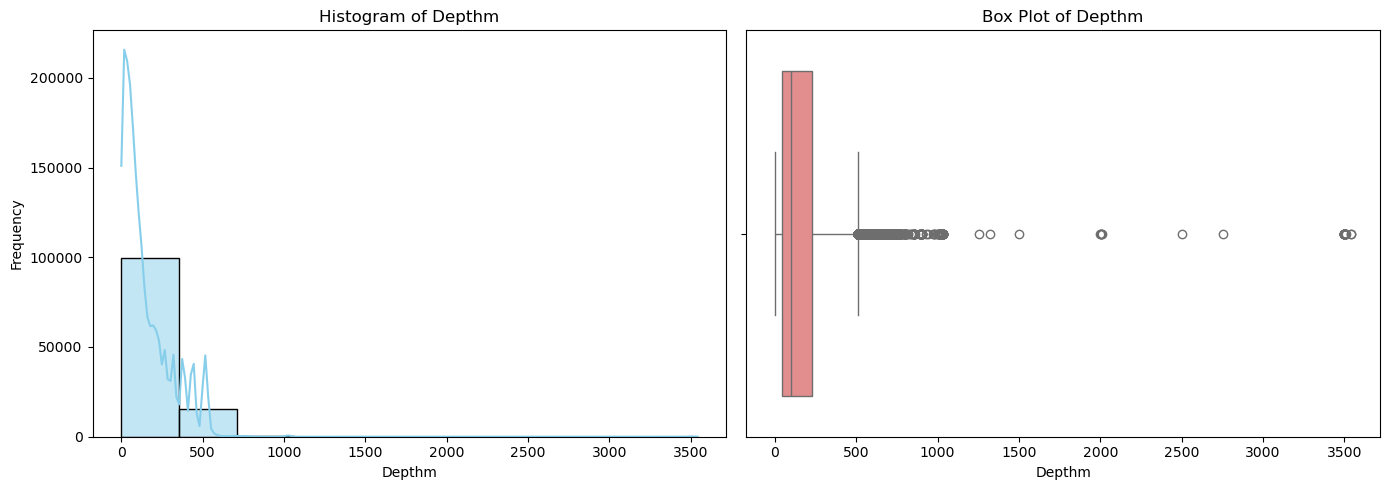

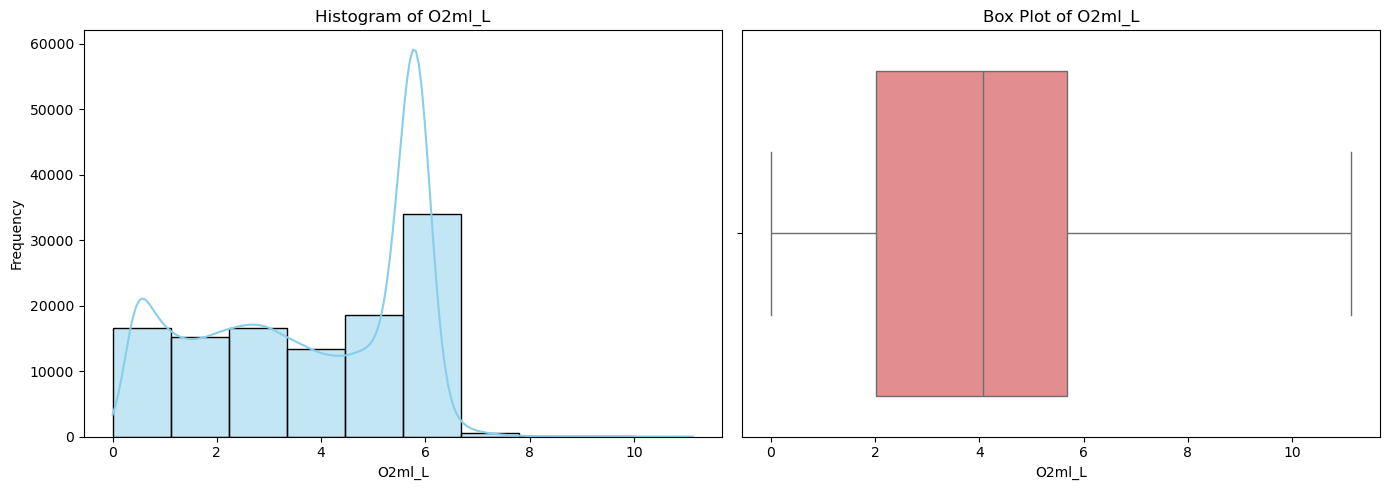

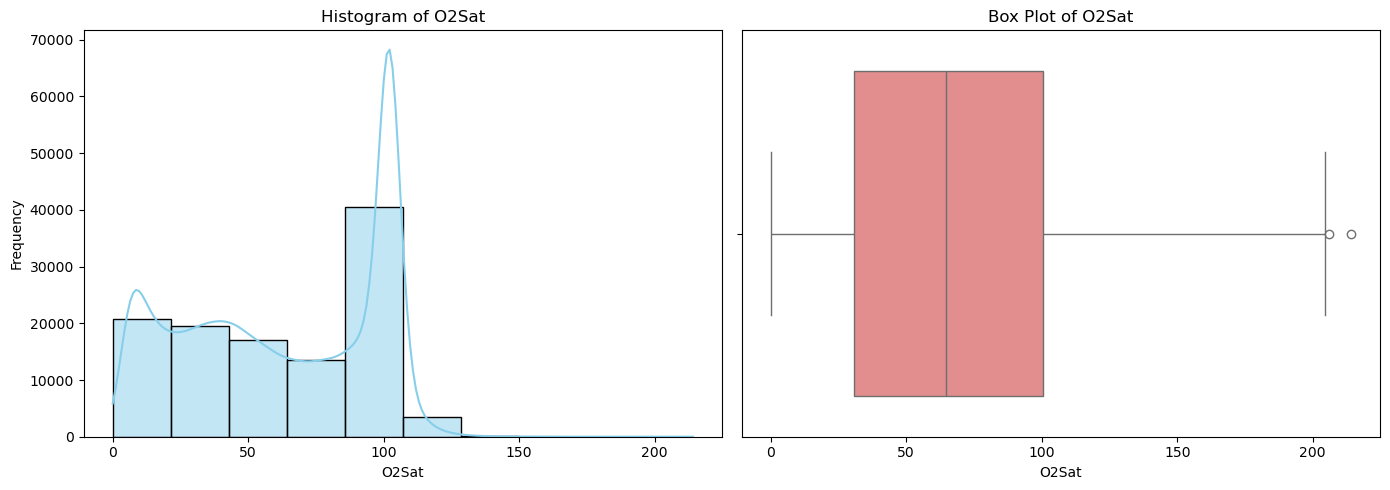

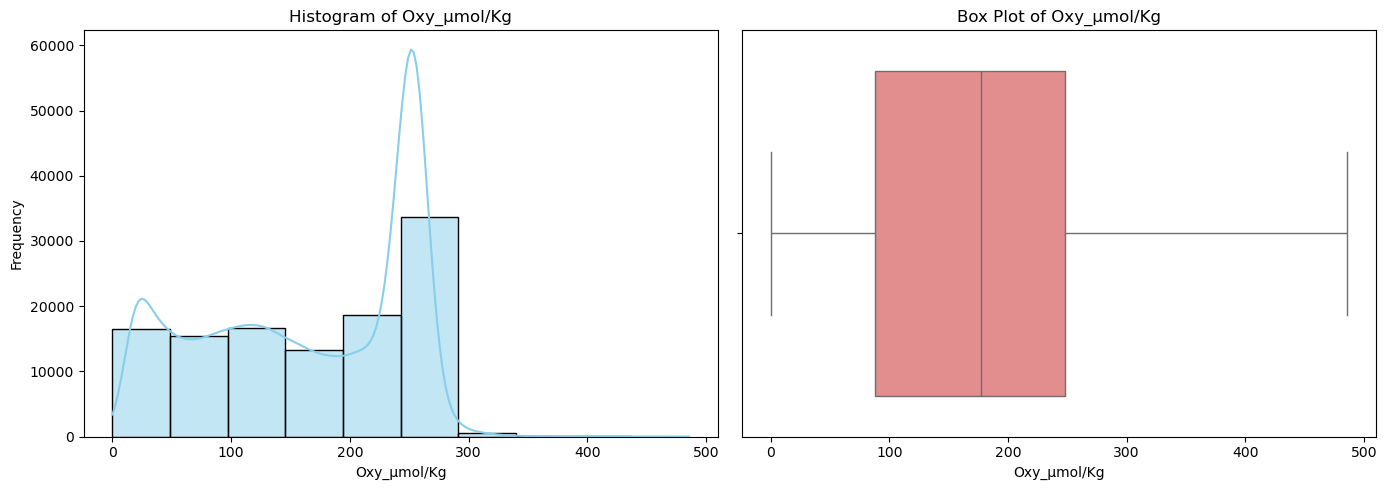

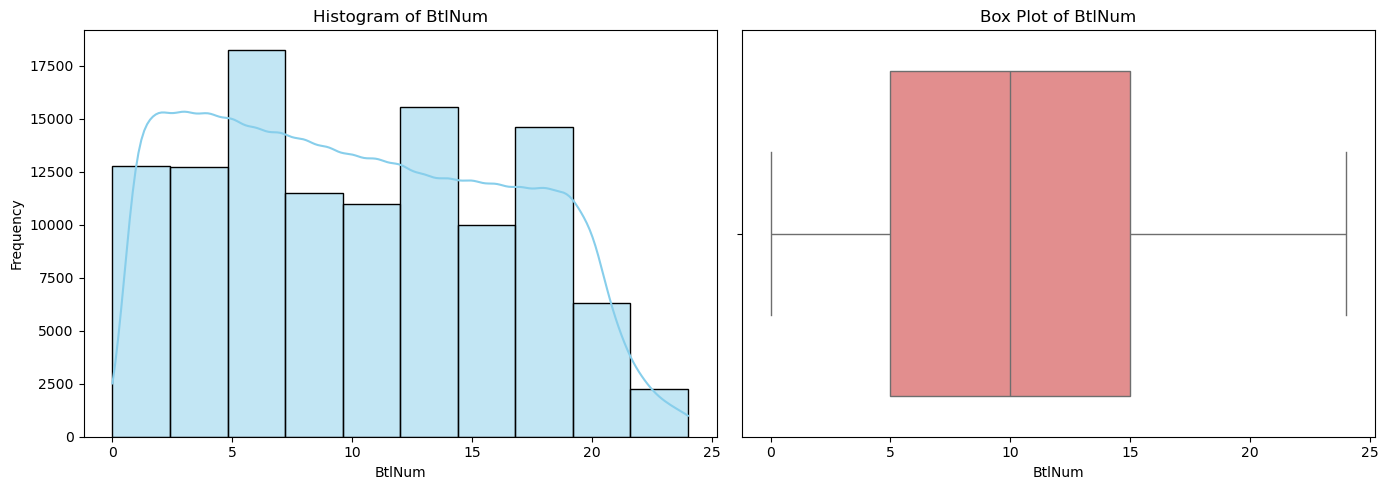

In [30]:
for col in numeric_df.columns:
    plt.figure(figsize=(14, 5))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(numeric_df[col], kde=True, bins=10, color='skyblue')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

    # Box Plot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=numeric_df[col], color='lightcoral')
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)

    plt.tight_layout()
    plt.show()

Mean Squared Error: 197.33705618211766


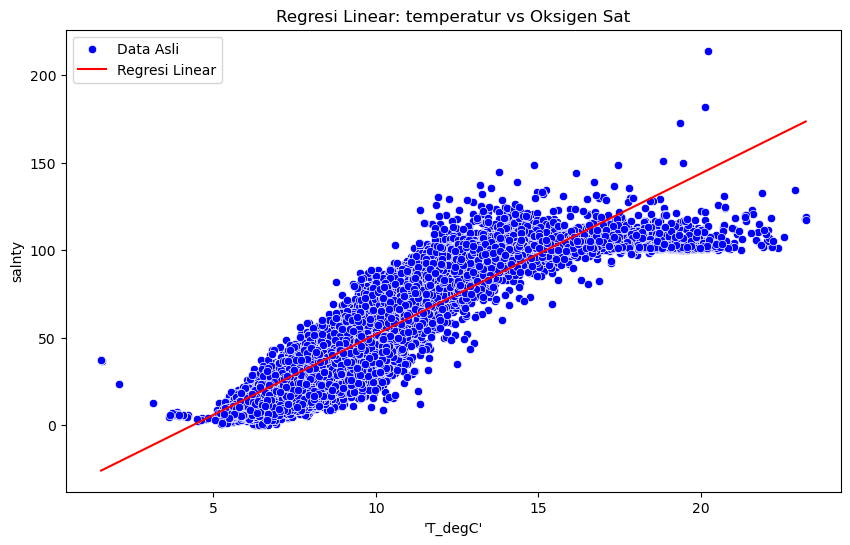

In [31]:
# 1. Pilih fitur dan target
X = final_data[['T_degC']]  # Variabel indep
y = final_data['O2Sat']    # Variabel dep

# 2. Pisahkan data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Inisialisasi dan latih model regresi linear
model = LinearRegression()
model.fit(X_train, y_train)

# 4. Prediksi data uji
y_pred = model.predict(X_test)

# 5. Hitung Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# 6. Visualisasi hasil regresi
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test['T_degC'], y=y_test, color='blue', label='Data Asli')
sns.lineplot(x=X_test['T_degC'], y=y_pred, color='red', label='Regresi Linear')
plt.xlabel("'T_degC'")
plt.ylabel("salnty")
plt.title("Regresi Linear: temperatur vs Oksigen Sat")
plt.legend()
plt.show()

In [32]:
y_pred = model.predict(X_test)                                     # Predict Linear Model
accuracy_score = model.score(X_test, y_test)                       # Accuracy score
print("Linear Regression Model Accuracy Score: " + "{:.1%}".format(accuracy_score))

Linear Regression Model Accuracy Score: 84.4%


In [33]:
r2 = r2_score(y_test, y_pred)
print("R-squared (R²) Score:", r2)

R-squared (R²) Score: 0.843752735799992


In [34]:
mlin_df = LinearRegression()
mlin_df = mlin_df.fit(X_train, y_train)
mlin_df.intercept_       # constant b0
mlin_df.coef_            # variable coefficient

array([9.20479572])

In [35]:
y_pred = mlin_df.predict(X_train)                                      # predict Multi linear Reg model
rmse = np.sqrt(mean_squared_error(y_train, mlin_df.predict(X_train)))
print("RMSE Score for Test set: " +"{:.2}".format(rmse))


print("R2 Score for Test set: " +"{:.3}".format(r2_score(y_train, y_pred)));      # this is test error score

RMSE Score for Test set: 1.4e+01
R2 Score for Test set: 0.843


In [36]:
# cross validation method is giving better and clear result

cross_val_score(mlin_df, X, y, cv=10, scoring = 'r2').mean()

0.84111721282962

In [37]:
mlin_df.score(X_train, y_train)      # r2 value

0.8434035536432944

In [38]:
np.sqrt(-cross_val_score(mlin_df, 
                X_train, 
                y_train, 
                cv=10, 
                scoring = 'neg_mean_squared_error')).mean()

14.037119183770761

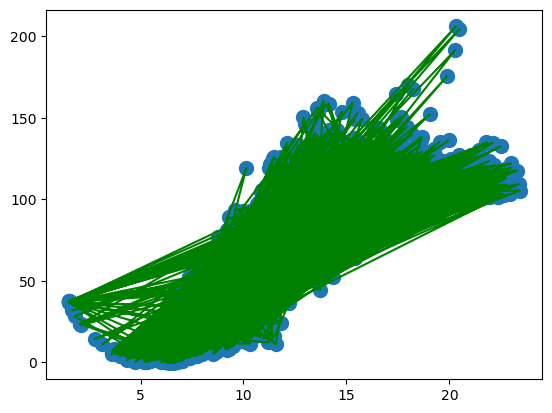

In [39]:
# Finally draw figure of Multiple Linear Regression Model

plt.scatter(X_train, y_train, s=100)

# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(X_train,y_pred), key=sort_axis)
X_test, y_pred = zip(*sorted_zip)
plt.plot(X_train, y_train, color='g')
plt.show()


In [40]:
poly_df = PolynomialFeatures(degree = 4)
transform_poly = poly_df.fit_transform(X_train)

linreg2 = LinearRegression()
linreg2.fit(transform_poly,y_train)

polynomial_predict = linreg2.predict(transform_poly)

In [41]:
rmse = np.sqrt(mean_squared_error(y_train,polynomial_predict))
r2 = r2_score(y_train,polynomial_predict)
print("RMSE Score for Test set: " +"{:.2}".format(rmse))
print("R2 Score for Test set: " +"{:.2}".format(r2))


RMSE Score for Test set: 9.8
R2 Score for Test set: 0.92


Polynomial Regression Model R-squared Score: 0.9011915553632914


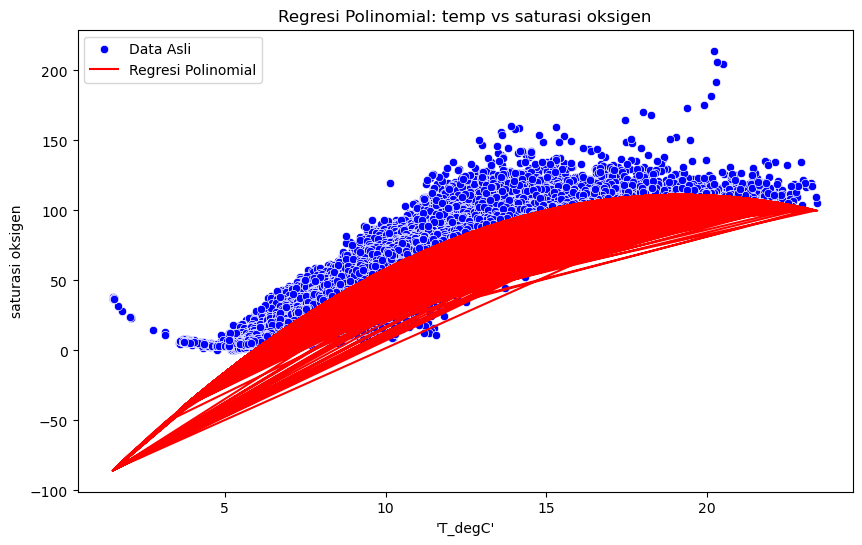

In [42]:
# Konversi ke fitur polinomial (misalnya, pangkat 2)
poly = PolynomialFeatures(degree=2)  # Menggunakan derajat 2, dapat disesuaikan
X_poly = poly.fit_transform(X)

# Inisialisasi dan latih model regresi polinomial
model = LinearRegression()
model.fit(X_poly, y)

# Prediksi menggunakan fitur polinomial
y_pred = model.predict(X_poly)

# Hitung R-squared
r2 = r2_score(y, y_pred)
print("Polynomial Regression Model R-squared Score:", r2)

# Visualisasi hasil regresi polinomial
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X['T_degC'], y=y, color='blue', label='Data Asli')
plt.plot(X['T_degC'], y_pred, color='red', label='Regresi Polinomial')
plt.xlabel("'T_degC'")
plt.ylabel("saturasi oksigen")
plt.title("Regresi Polinomial: temp vs saturasi oksigen")
plt.legend()
plt.show()

In [43]:
dt_reg = DecisionTreeRegressor()          # create  DecisionTreeReg with sklearn
dt_reg.fit(X_train,y_train)

DecisionTreeRegressor()

In [44]:
dt_predict = dt_reg.predict(X_train)
dt_predict.mean()

62.87371094217321

C:\Users\Dafa\AppData\Local\Temp\ipykernel_1604\266260750.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(np.array(X_train)),max(np.array(X_train)), 0.01)
C:\Users\Dafa\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


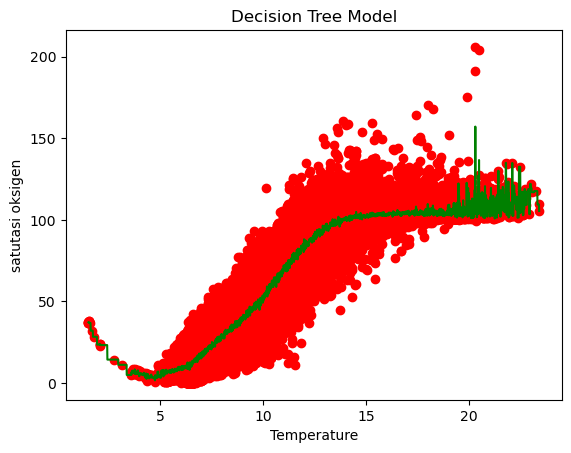

In [45]:
plt.scatter(X_train,y_train, color="red")                           # scatter draw
X_grid = np.arange(min(np.array(X_train)),max(np.array(X_train)), 0.01)  
X_grid = X_grid.reshape((len(X_grid), 1))
plt.plot(X_grid,dt_reg.predict(X_grid),color="g")                 # line draw
plt.xlabel("Temperature")
plt.ylabel("satutasi oksigen")
plt.title("Decision Tree Model")
plt.show()

In [46]:
rmse = np.sqrt(mean_squared_error(y_train,dt_predict))
r2 = r2_score(y_train,dt_predict)
print("RMSE Score for Test set: " +"{:.2}".format(rmse))
print("R2 Score for Test set: " +"{:.2}".format(r2))

RMSE Score for Test set: 9.1
R2 Score for Test set: 0.93
